Search in Kaggle for challenges-in-representation-learning-facial-expression-recognition-challenge

Here is a link:

<a href="https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge">Dataset</a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd


In [2]:
def get_data():
    data = pd.read_csv('datasets/fer/train.csv')
    data = data.to_numpy()
    # we will do binary classification
    Y = data[:,0]
    X = data[:,1]
    select = np.logical_or(Y==0, Y==1)
    X = X[select]
    Y = Y[select].astype('int32')
    X = [pixels.split() for pixels in X]
    X = np.array(X).astype('float32')
    X,Y = shuffle(X,Y)
    return X/256.0,Y

In [3]:
class logistic():
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cross_entropy(self,Y,Yhat):
        cost = 0
        select = Y == 0
        cost-= np.log(1-Yhat[select]).sum()
        select = Y == 1
        cost -= np.log(Yhat[select]).sum()
        return cost
    
    def predict(self,X):
        N,D = X.shape
        if D != self.w.shape[0]: # need to ad column of 1
            ones = np.atleast_2d(np.ones(N)).T
            X = np.hstack((ones,X))
        z = X@self.w
        Yhat = self.sigmoid(z)
        Yhat = np.round(Yhat)
        return Yhat
    
    def score(self,X,Y):
        Yhat = self.predict(X)
        return (Y==Yhat).mean()
        
    def fit(self,X,Y,lr = 10e-7,epochs=120000,plot_costs=True,l2 =0, l1 =0):
            N,D = X.shape
            ones = np.atleast_2d(np.ones(N)).T
            X = np.hstack((ones,X))
            costs = []
            w = np.random.randn(D+1)/np.sqrt(D+1)
            
            for i in range(epochs):
                z = X@w
                Yhat = self.sigmoid(z)
                cost = self.cross_entropy(Y,Yhat)
                costs.append(cost)
                # elastic net
                w = w - lr*(X.T@(Yhat-Y) + l2*w + l1*np.sign(w))
                if i%1000 == 0:
                    print('iteration: ',i,' cost: ',cost)
            self.w = w
            print('final train classification score: ',model.score(X,Y))
            if plot_costs:
                plt.plot(costs)
                plt.show()


In [4]:
X,Y = get_data()
N = 3000
Xtrain,Ytrain = X[:N], Y[:N]
Xtest , Ytest = X[N:] , Y[N:]

iteration:  0  cost:  2024.5594002714297
iteration:  1000  cost:  982.7461719510839
iteration:  2000  cost:  954.7433735149166
iteration:  3000  cost:  936.5559086349236
iteration:  4000  cost:  922.334355622142
iteration:  5000  cost:  910.2153463912218
iteration:  6000  cost:  899.4486980292534
iteration:  7000  cost:  889.6667192671716
iteration:  8000  cost:  880.6581097594059
iteration:  9000  cost:  872.2859907137241
iteration:  10000  cost:  864.453738549204
iteration:  11000  cost:  857.0888958759032
iteration:  12000  cost:  850.1347588558292
iteration:  13000  cost:  843.5455694720204
iteration:  14000  cost:  837.2835547921146
iteration:  15000  cost:  831.3169872764929
iteration:  16000  cost:  825.6188483996586
iteration:  17000  cost:  820.165870005188
iteration:  18000  cost:  814.9378241599143
iteration:  19000  cost:  809.9169834184282
iteration:  20000  cost:  805.087702026512
iteration:  21000  cost:  800.436085402964
iteration:  22000  cost:  795.9497255640088
itera

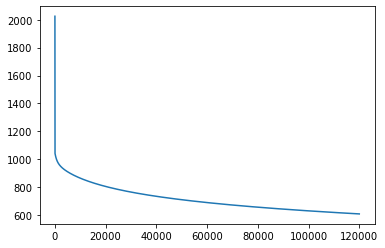

Test classification score:  0.8951781970649895


In [5]:
model = logistic()
model.fit(Xtrain,Ytrain)
print('Test classification score: ',model.score(Xtest,Ytest))